In [2]:
#imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#reading the csv file
dir  = globals()['_dh'][0].parent
file_path = dir / 'data' / 'cleaned_data.pkl'
df = pd.read_pickle(file_path)
print(df.shape)
df.head(5)


(16680, 16)


,OrgID,EnrollDate,ChurnDate,OrgSize,Industry,IndustryGroup,Enrollment Plan,PromoType,Acquisition Channel,F28 Active Rate,Avg Lifetime Active,F28 Cc Flag,eLTV/CAC,Churned,Enrollment Duration,User_id
0,44,2021-02-01,NaT,0-1,Flooring,Other,Extra large,No Promo,Marketing - Paid,0.607,0.096,0,4.1,0,676.0,4420210201
1,70,2022-03-01,NaT,0-1,Plumbing,Plumbing,Starter,No Promo,NaN,0.071,0.340,0,1.2,0,283.0,7020220301
2,1494,2020-10-02,NaT,0-1,Carpet Cleaning,Carpet Cleaning,Small,No Promo,Product,1.000,0.379,1,3.4,0,798.0,149420201002
3,1604,2020-10-08,2020-12-08,11+,Restoration,Other,Large,2+ month,Sales,0.500,0.004,0,6.2,1,61.0,160420201008
4,1652,2020-02-03,2020-03-02,11+,Solar & Energy,Other,Large,One Month,Sales,0.000,0.001,0,4.7,1,28.0,165220200203


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680 entries, 0 to 16679
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   OrgID                16680 non-null  int64         
 1   EnrollDate           16680 non-null  datetime64[ns]
 2   ChurnDate            6703 non-null   datetime64[ns]
 3   OrgSize              16671 non-null  category      
 4   Industry             16655 non-null  object        
 5   IndustryGroup        16680 non-null  object        
 6   Enrollment Plan      16677 non-null  category      
 7   PromoType            16680 non-null  category      
 8   Acquisition Channel  15947 non-null  object        
 9   F28 Active Rate      16680 non-null  float64       
 10  Avg Lifetime Active  16680 non-null  float64       
 11  F28 Cc Flag          16680 non-null  int64         
 12  eLTV/CAC             16549 non-null  float64       
 13  Churned              16680 non-

## 1 - Analysing from Acquisiton Channel
Findings: \
1 - Sales has a higher churn rate then the other channels and the lower ltv/cac ratio \
2 - Skyboss have the lowest churn rate by far, and a great ltv/cac ratio, but may seem limited regarding volume. Plumbing is the predominant Industry \
3 - Marketing offers a ballance between ltv/cac and churn with great volume. It has potential to decrease churn still \
4 - BD has a greater % of large and extra large clients, but it also deals with a lot of 0-1 organizations. Maybe by focusing on bigger orgs, the results can be improved even further \
5 - Clients that come from Sales tend to have shorter Enrollment Duration




In [5]:
#percentual of churned users
churn_perc = df[df['ChurnDate'].notnull()]['ChurnDate'].count() / len(df) * 100
churn_perc

40.18585131894484

In [6]:
#percentual of users for each promo type
df_promo = pd.DataFrame()
df_promo['users'] = df.groupby('Acquisition Channel')['Acquisition Channel'].count()
df_promo['users_perc'] = df.groupby('Acquisition Channel')['Acquisition Channel'].count() / len(df)

#percentual of churned users for each promo type 
df_promo['churned_users'] = df[df['ChurnDate'].notnull()].groupby('Acquisition Channel')['Acquisition Channel'].count()
df_promo['churned_users_perc'] = (df_promo['churned_users'] / df_promo['users'])

#share of churned users regarding all churned users for each promo type
df_promo['share_of_churned_users'] = df_promo['churned_users'] / df[df['ChurnDate'].notnull()]['ChurnDate'].count()

#average duration of enrollment for each promo type
df_promo['avg_duration'] = df.groupby('Acquisition Channel')['Enrollment Duration'].mean()

#average F28 Active Rate for each promo type
df_promo['avg_F28_Active_Rate'] = df.groupby('Acquisition Channel')['F28 Active Rate'].mean()

#average Avg Lifetime Active for each promo type
df_promo['avg_Avg_Lifetime_Active'] = df.groupby('Acquisition Channel')['Avg Lifetime Active'].mean()

#avg ltv/cac for each promo type
df_promo['avg_ltv_cac'] = df.groupby('Acquisition Channel')['eLTV/CAC'].mean()

#avg financial impact for each promo type
df_promo['avg_financial_impact'] = (df_promo['users'] - df_promo['churned_users']) * df_promo['avg_ltv_cac']

#most predominant PromoType for each promo type -----------------------
df_promo['most_predominant_PromoType'] = df.groupby('Acquisition Channel')['PromoType'].agg(lambda x:x.value_counts().index[0])

#most predominant Acquisition Channelfor each promo type
df_promo['most_predominant_Enrollment_Plan'] = df.groupby('Acquisition Channel')['OrgSize'].agg(lambda x:x.value_counts().index[0])

#most predominant Industry for each promo type
#df_promo['most_predominant_Industry'] = df.groupby('Acquisition Channel')['Industry'].agg(lambda x:x.value_counts().index[0])

#most predominant Industry Group for each promo type
#df_promo['most_predominant_Industry_Group'] = df.groupby('Acquisition Channel')['IndustryGroup'].agg(lambda x:x.value_counts().index[0])

#most_predominant Acquisition Channel for each promo type
#df_promo['most_predominant_Acquisition_Channel'] = df.groupby('Acquisition Channel')['Acquisition Channel'].agg(lambda x:x.value_counts().index[0])

df_promo


,users,users_perc,churned_users,churned_users_perc,share_of_churned_users,avg_duration,avg_F28_Active_Rate,avg_Avg_Lifetime_Active,avg_ltv_cac,avg_financial_impact,most_predominant_PromoType,most_predominant_Enrollment_Plan
Acquisition Channel,,,,,,,,,,,,
BD,607,0.036391,139,0.228995,0.020737,461.774300,0.338381,0.392652,5.960927,2789.713907,No Promo,2-6
Innovation,189,0.011331,66,0.349206,0.009846,406.873016,0.324624,0.290323,4.286243,527.207937,One Month,2-6
Marketing - Paid,4363,0.261571,1503,0.344488,0.224228,392.079532,0.347777,0.300131,3.387633,9688.629442,One Month,0-1
Marketing - Unpaid,4464,0.267626,1444,0.323477,0.215426,409.287634,0.366059,0.334351,3.723834,11245.979629,One Month,0-1
Product,185,0.011091,34,0.183784,0.005072,485.794595,0.417405,0.402059,3.116848,470.644022,One Month,0-1
Sales,6002,0.359832,3258,0.542819,0.486051,295.970843,0.155247,0.116886,2.660342,7299.979064,One Month,2-6
Skyboss,137,0.008213,12,0.087591,0.001790,523.978102,0.414234,0.468270,8.573134,1071.641791,2+ month,2-6


In [ ]:
#avg ltv/cac for Marketing as a whole
df[(df['Acquisition Channel'] == 'Marketing - Paid') | (df['Acquisition Channel'] == 'Marketing - Unaid')]['eLTV/CAC'].mean()

3.387632671896631

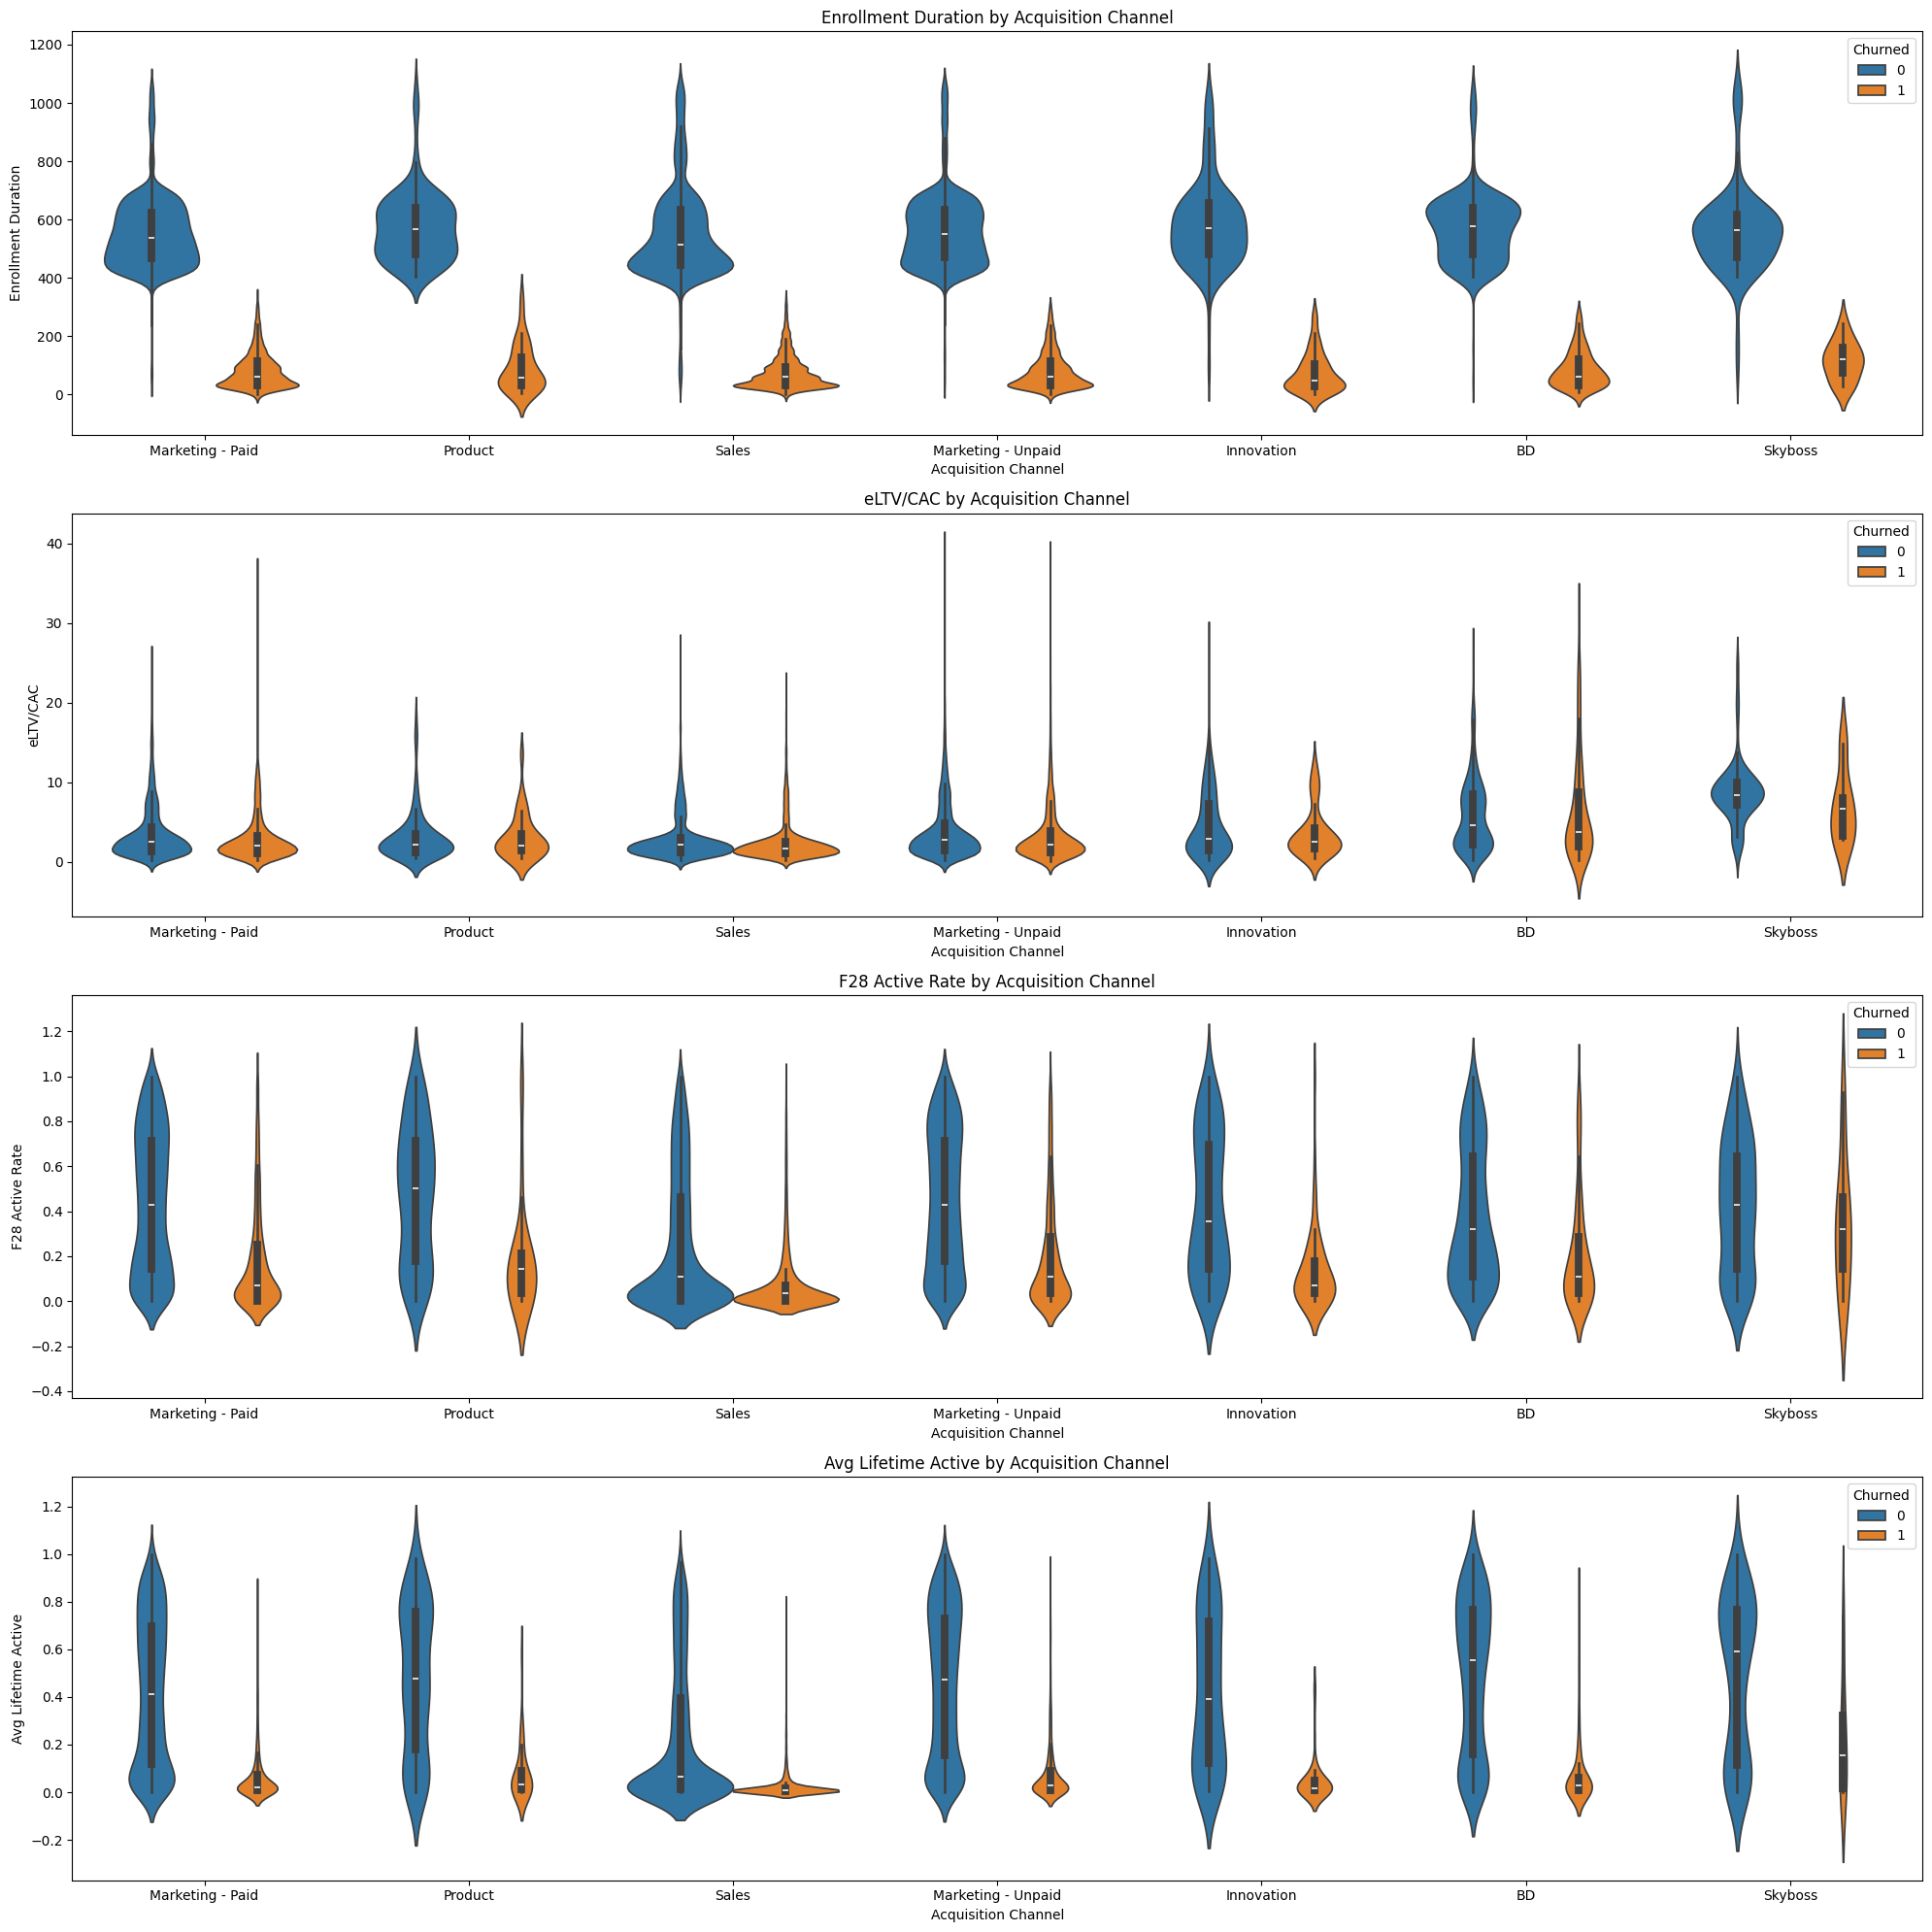

In [ ]:
#violin plot for the promotion type
fig, axs = plt.subplots(4,1, figsize=(20, 20))

sns.violinplot(x='Acquisition Channel', y='Enrollment Duration', data=df, ax=axs[0], hue="Churned")
axs[0].set_title('Enrollment Duration by Acquisition Channel')  # Set title for the first subplot

sns.violinplot(x='Acquisition Channel', y='eLTV/CAC', data=df, ax=axs[1], hue="Churned")
axs[1].set_title('eLTV/CAC by Acquisition Channel')  # Set title for the second subplot

sns.violinplot(x='Acquisition Channel', y='F28 Active Rate', data=df, ax=axs[2], hue="Churned")
axs[2].set_title('F28 Active Rate by Acquisition Channel')  # Set title for the third subplot

sns.violinplot(x='Acquisition Channel', y='Avg Lifetime Active', data=df, ax=axs[3], hue="Churned")
axs[3].set_title('Avg Lifetime Active by Acquisition Channel')  # Set title for the fourth subplot


plt.tight_layout()
plt.show()

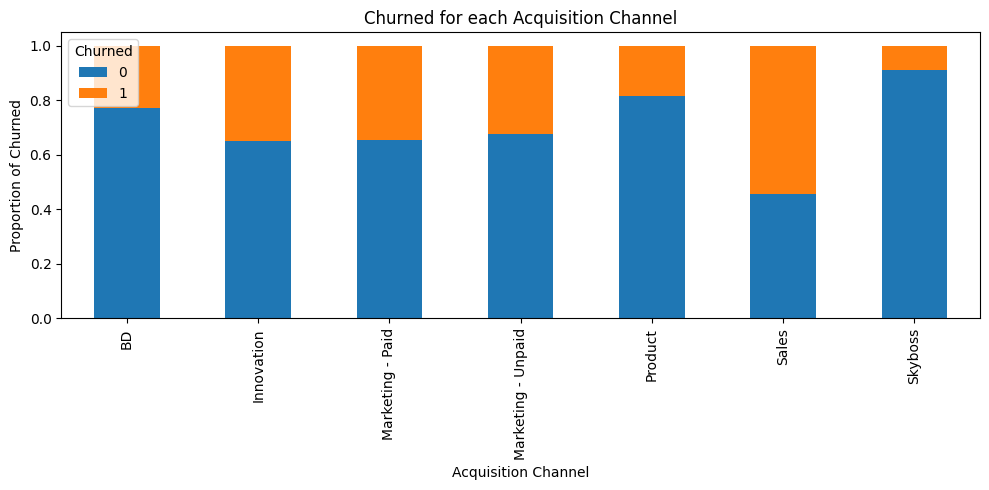

In [ ]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Group by Acquisition Channel and Churned, count occurrences, and unstack for plotting
grouped = df[df['Churned'].notnull()].groupby(['Acquisition Channel', 'Churned']).size().unstack()

# Normalize the data to show proportions (optional)
grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, ax=ax)

# Set title and labels
ax.set_title('Churned for each Acquisition Channel')
ax.set_ylabel('Proportion of Churned')  # Change to 'Count' if not normalizing
ax.set_xlabel('Acquisition Channel')

# Display the plot
plt.tight_layout()
plt.show()

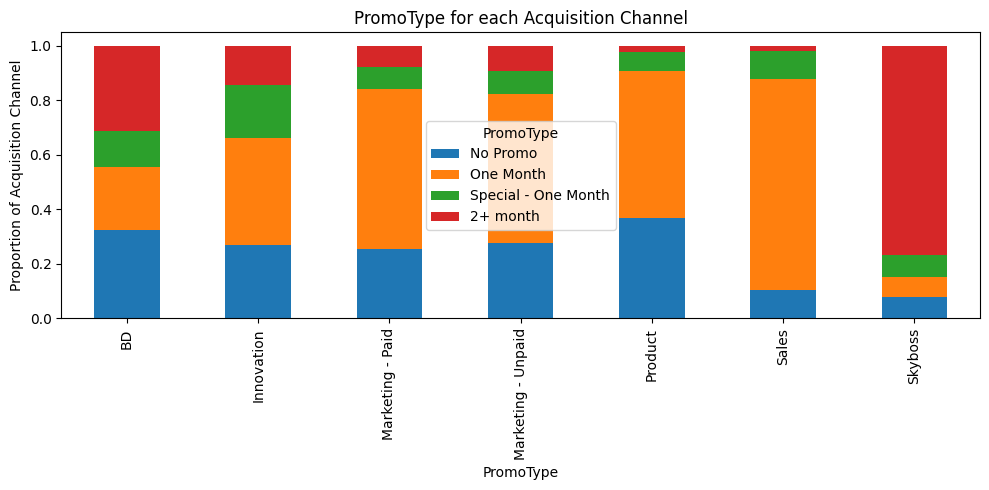

In [ ]:
# Create the figure and axis ---------------------------
fig, ax = plt.subplots(figsize=(10, 5))

# Group by OrgSize and Enrollment Plan, count occurrences, and unstack for plotting 
grouped = df[df['PromoType'].notnull()].groupby(['Acquisition Channel', 'PromoType']).size().unstack()

# Normalize the data to show proportions (optional)
grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, ax=ax)

# Set title and labels
ax.set_title('PromoType for each Acquisition Channel')
ax.set_ylabel('Proportion of Acquisition Channel')  # Change to 'Count' if not normalizing
ax.set_xlabel('PromoType')

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\gfmar\AppData\Local\Temp\ipykernel_6784\3463988015.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


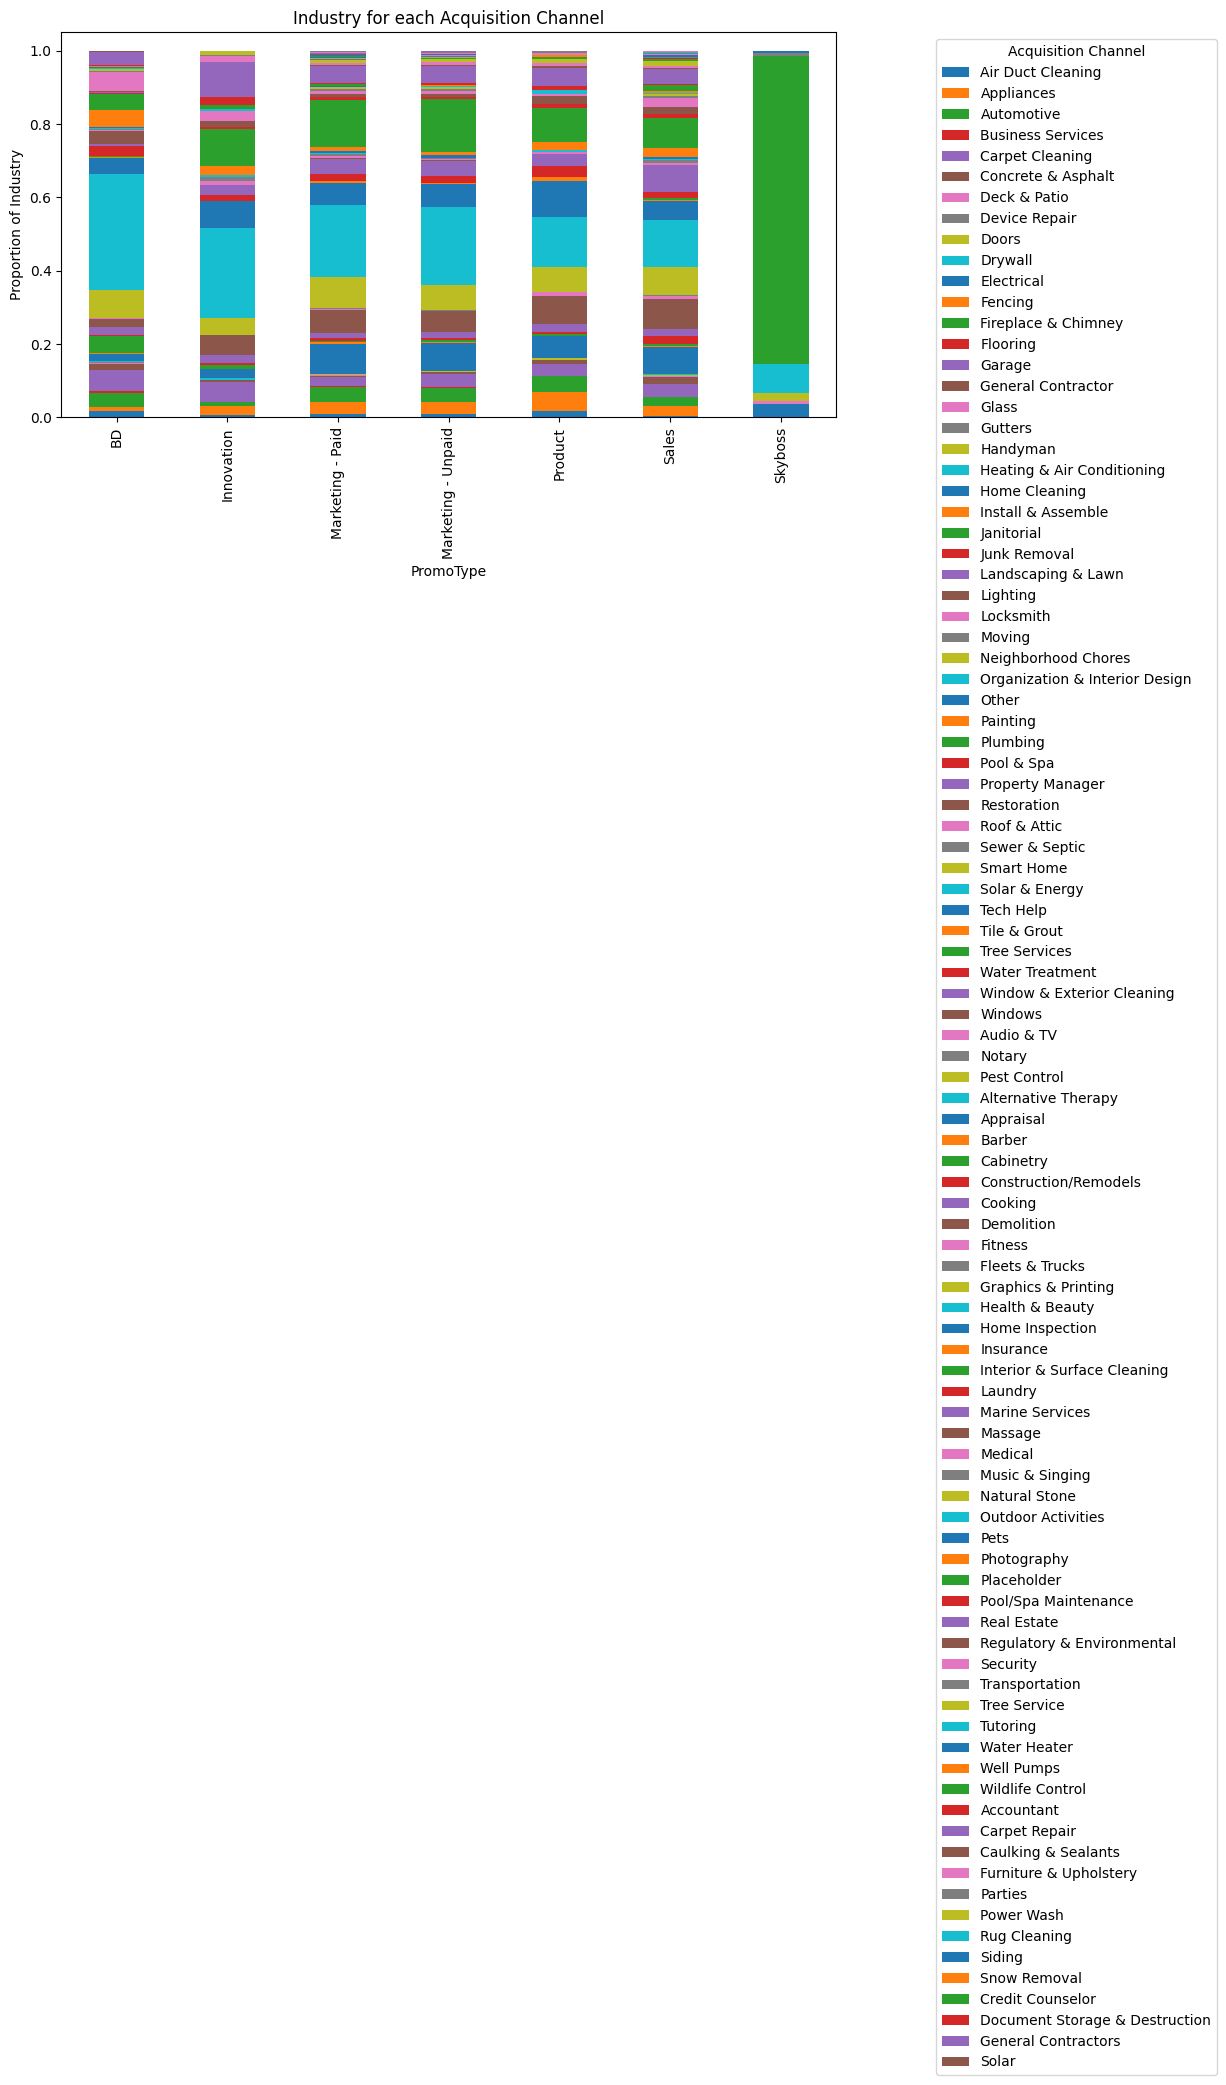

In [ ]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Group by PromoType and OrgSize, count occurrences, and unstack for plotting
grouped = df[df['Industry'].notnull()].groupby(['Acquisition Channel', 'Industry']).size().unstack()

# Normalize the data to show proportions (optional)
grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, ax=ax)

# Set title and labels
ax.set_title('Industry for each Acquisition Channel')
ax.set_ylabel('Proportion of Industry')  # Change to 'Count' if not normalizing
ax.set_xlabel('PromoType')

# Move the legend to a better location
ax.legend(title='Acquisition Channel', loc='upper right', bbox_to_anchor=(1.5, 1))

# Display the plot
plt.tight_layout()
plt.show()

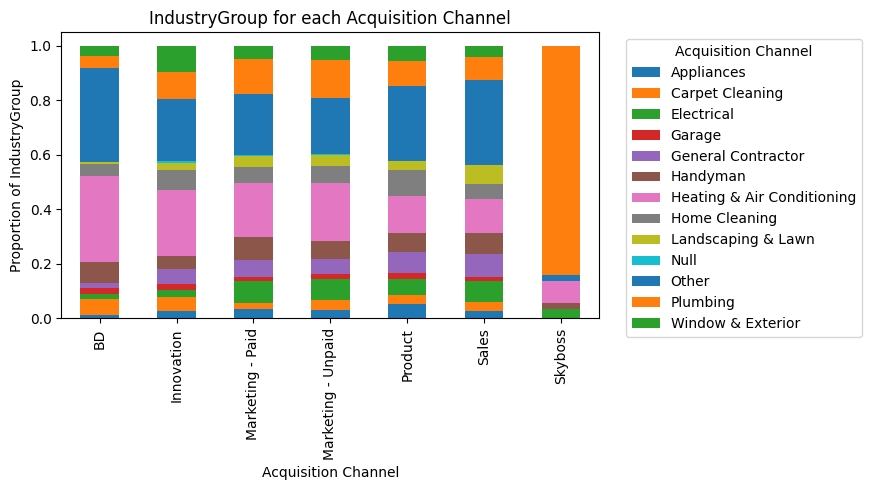

In [ ]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Group by OrgSize and Acquisition Channel, count occurrences, and unstack for plotting
grouped = df[df['IndustryGroup'].notnull()].groupby(['Acquisition Channel', 'IndustryGroup']).size().unstack()

# Normalize the data to show proportions (optional)
grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, ax=ax)

# Set title and labels
ax.set_title('IndustryGroup for each Acquisition Channel')
ax.set_ylabel('Proportion of IndustryGroup')  # Change to 'Count' if not normalizing
ax.set_xlabel('Acquisition Channel')

# Move the legend to a better location
ax.legend(title='Acquisition Channel', loc='upper right', bbox_to_anchor=(1.5, 1))

# Display the plot
plt.tight_layout()
plt.show()

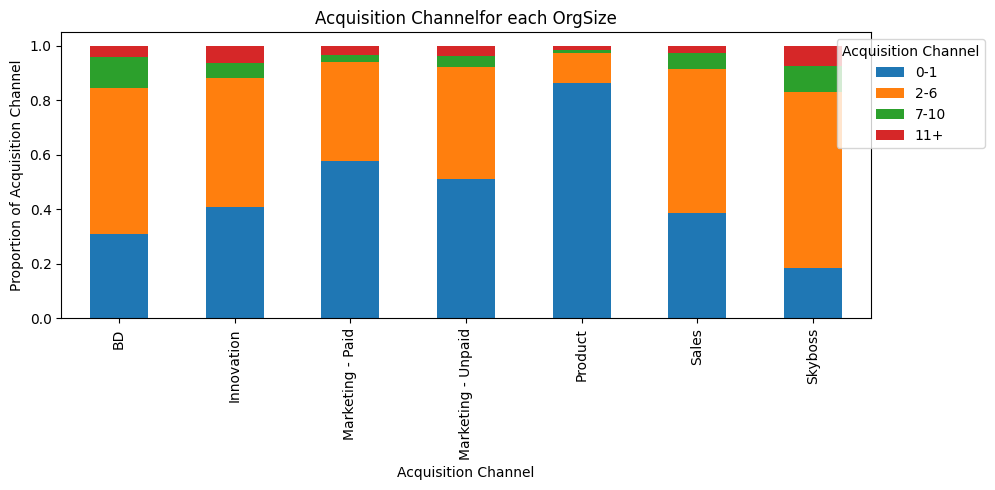

In [ ]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Group by OrgSize and Enrollment Plan, count occurrences, and unstack for plotting
grouped = df[df['OrgSize'].notnull()].groupby(['Acquisition Channel', 'OrgSize']).size().unstack()

# Normalize the data to show proportions (optional)
grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, ax=ax)

# Set title and labels
ax.set_title('Acquisition Channelfor each OrgSize')
ax.set_ylabel('Proportion of Acquisition Channel')  # Change to 'Count' if not normalizing
ax.set_xlabel('Acquisition Channel')

# Move the legend to a better location
ax.legend(title='Acquisition Channel', loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the plot
plt.tight_layout()
plt.show()

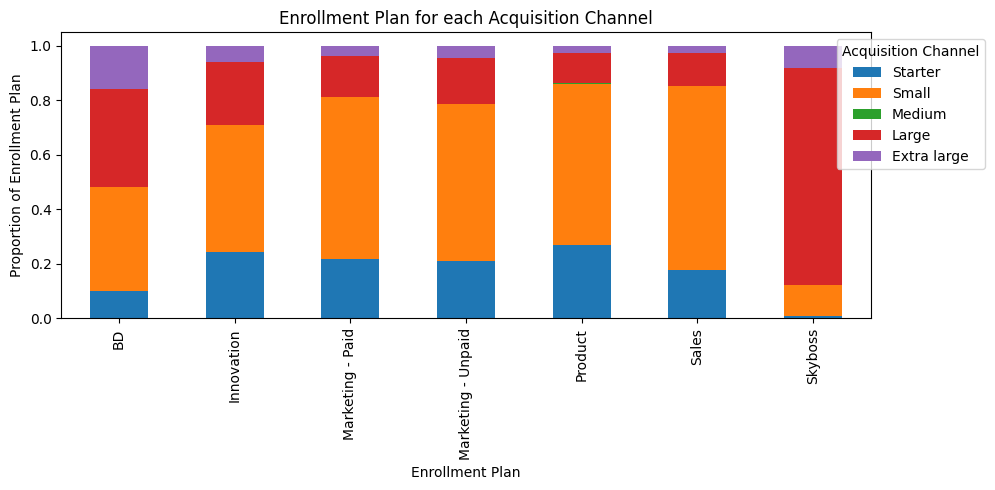

In [ ]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Group by Acquisition Channeland Enrollment Plan, count occurrences, and unstack for plotting
grouped = df[df['Enrollment Plan'].notnull()].groupby(['Acquisition Channel', 'Enrollment Plan']).size().unstack()

# Normalize the data to show proportions (optional)
grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, ax=ax)

# Set title and labels
ax.set_title('Enrollment Plan for each Acquisition Channel')
ax.set_ylabel('Proportion of Enrollment Plan')  # Change to 'Count' if not normalizing
ax.set_xlabel('Enrollment Plan')

# Move the legend to a better location
ax.legend(title='Acquisition Channel', loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the plot
plt.tight_layout()
plt.show()

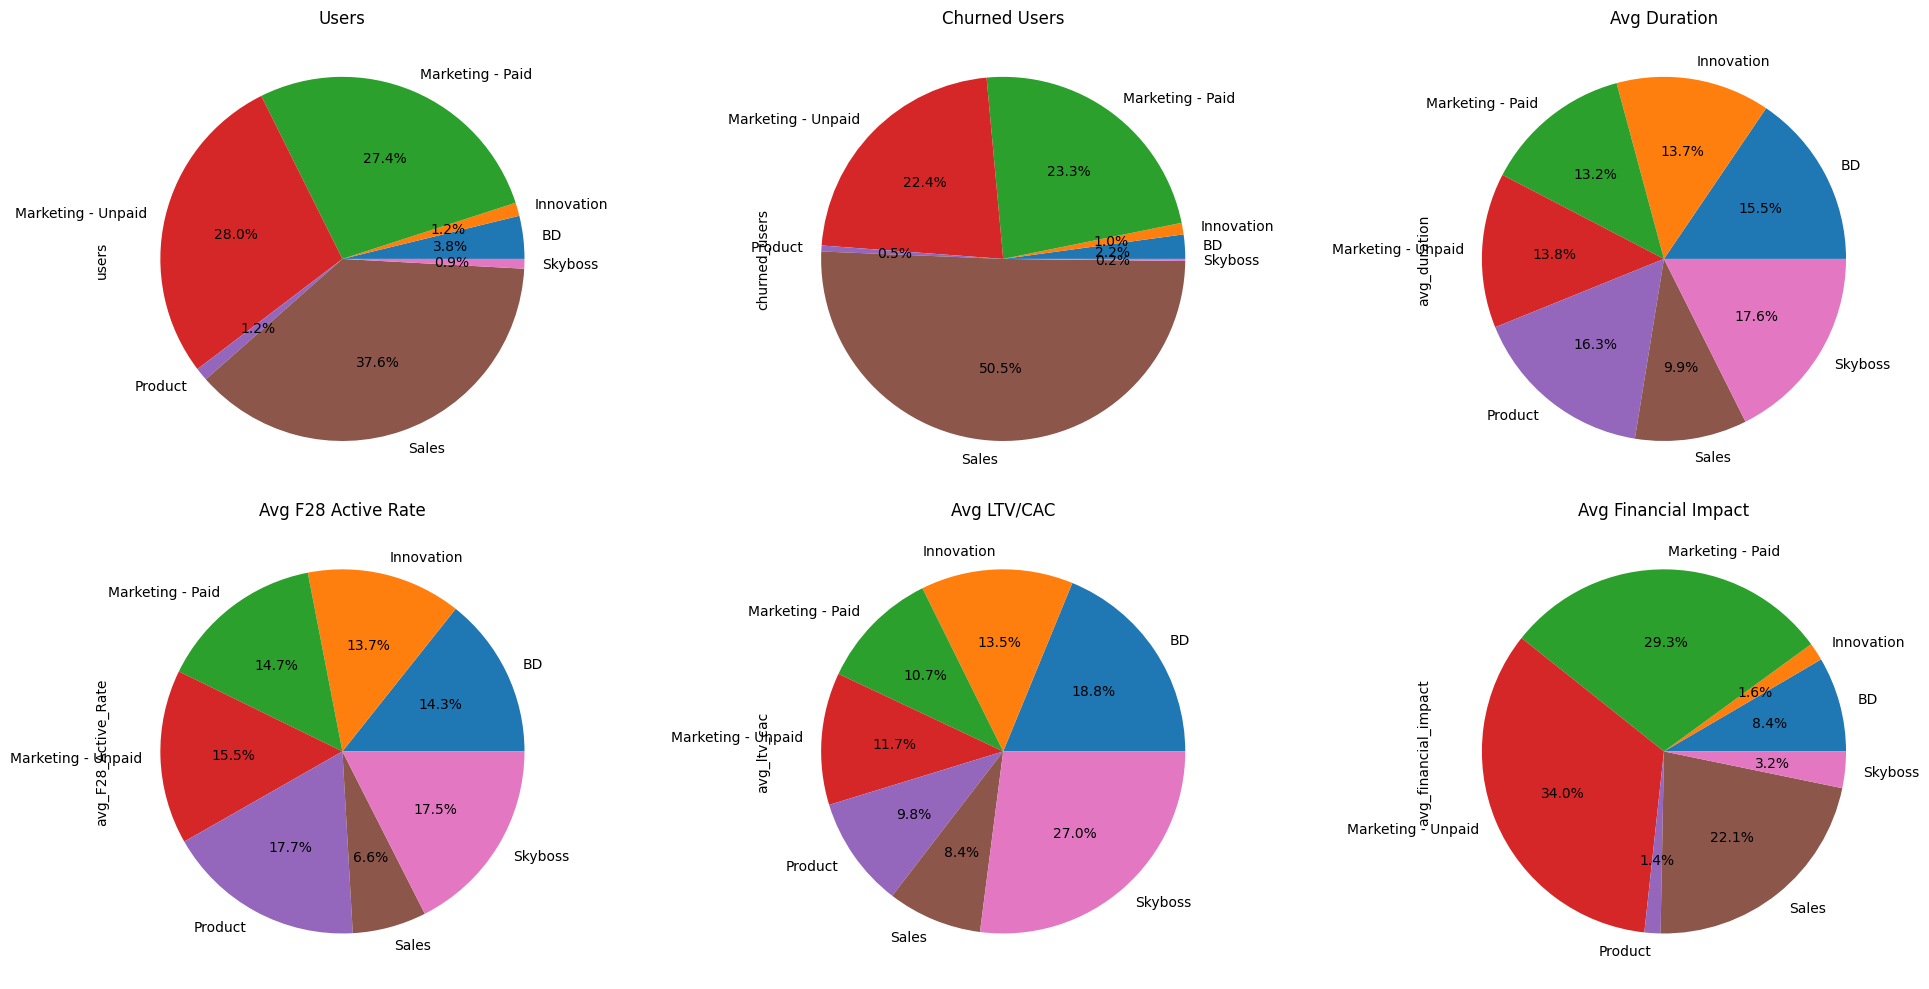

In [ ]:
#subplot of the df_promo dataframe with 6 pie charts for: users, churned_users,avg_duration, 
# avg_F28_Active_Rate, avg_ltv_cac, avg_financial_impact
fig, axs = plt.subplots(2,3, figsize=(20, 10))
df_promo['users'].plot.pie(ax=axs[0,0], autopct='%1.1f%%')
axs[0,0].set_title('Users')

df_promo['churned_users'].plot.pie(ax=axs[0,1], autopct='%1.1f%%')
axs[0,1].set_title('Churned Users')

df_promo['avg_duration'].plot.pie(ax=axs[0,2], autopct='%1.1f%%')
axs[0,2].set_title('Avg Duration')

df_promo['avg_F28_Active_Rate'].plot.pie(ax=axs[1,0], autopct='%1.1f%%')
axs[1,0].set_title('Avg F28 Active Rate')

df_promo['avg_ltv_cac'].plot.pie(ax=axs[1,1], autopct='%1.1f%%')
axs[1,1].set_title('Avg LTV/CAC')

df_promo['avg_financial_impact'].plot.pie(ax=axs[1,2], autopct='%1.1f%%')
axs[1,2].set_title('Avg Financial Impact')

plt.tight_layout()
plt.show()


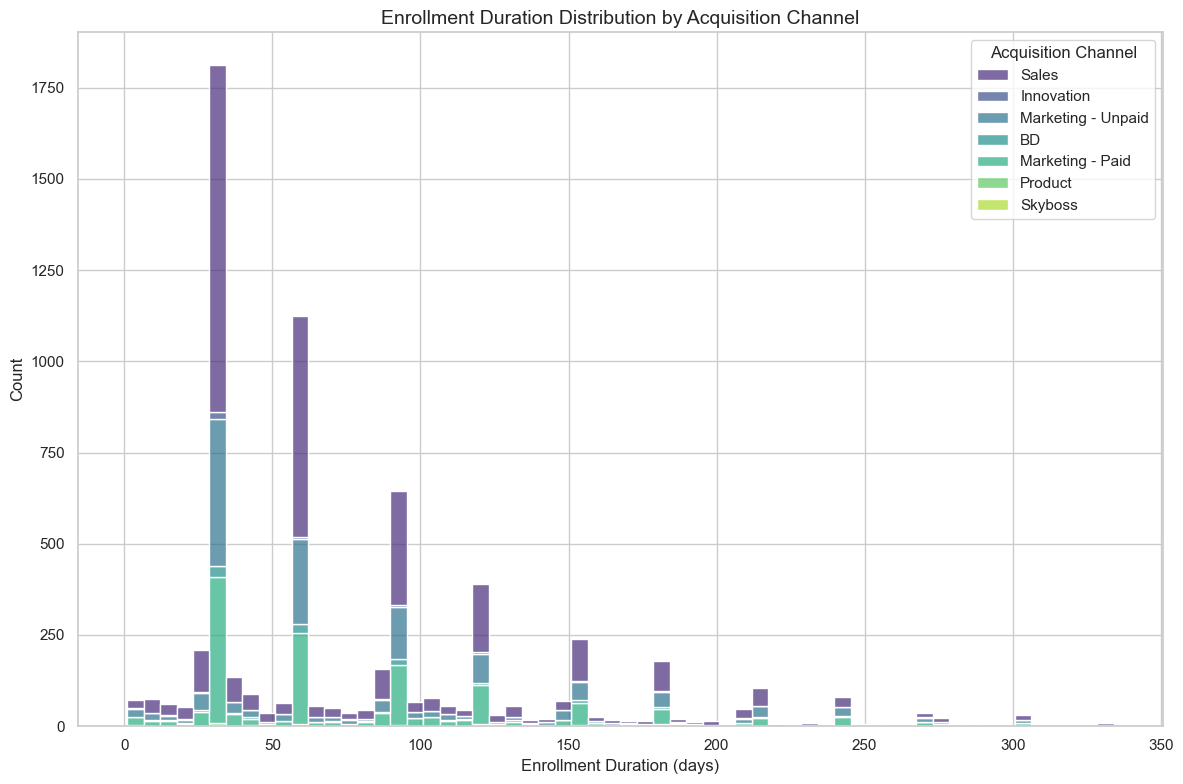

In [ ]:
df_churned = df[df['Churned'] == 1]


# Set the style for better visualization
sns.set(style="whitegrid")

# Create a figure with sufficient size
plt.figure(figsize=(12, 8))

# Define a custom color palette - you can choose different color schemes
# Options include: 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Set1', 'Set2', 'tab10', etc.
custom_palette = sns.color_palette("viridis", 7)  # Adjust the number based on your categories

# Create histograms for each Promotype category with the new color scheme
ax = sns.histplot(
    data=df_churned, 
    x="Enrollment Duration",
    hue="Acquisition Channel",
    multiple="stack",
    bins=60,
    alpha=0.7,
    palette=custom_palette
)

# Add labels and title
plt.xlabel('Enrollment Duration (days)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Enrollment Duration Distribution by Acquisition Channel', fontsize=14)

# Fix the legend - ensure it's shown with proper formatting
# Move it outside the plot to prevent overlap with data
#plt.legend(title='Promotion Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

